In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Data Wrangling

In [3]:
df = pd.read_csv('Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.drop(['ID'], axis=1, inplace=True) # Deleting column ID

In [5]:
df.isnull().sum() # No null values.

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
df.shape   # Shape of DataFrame.

(30000, 24)

In [7]:
df.columns # Columns of DataFrame

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [8]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Correlation Matrix Plot

<AxesSubplot:>

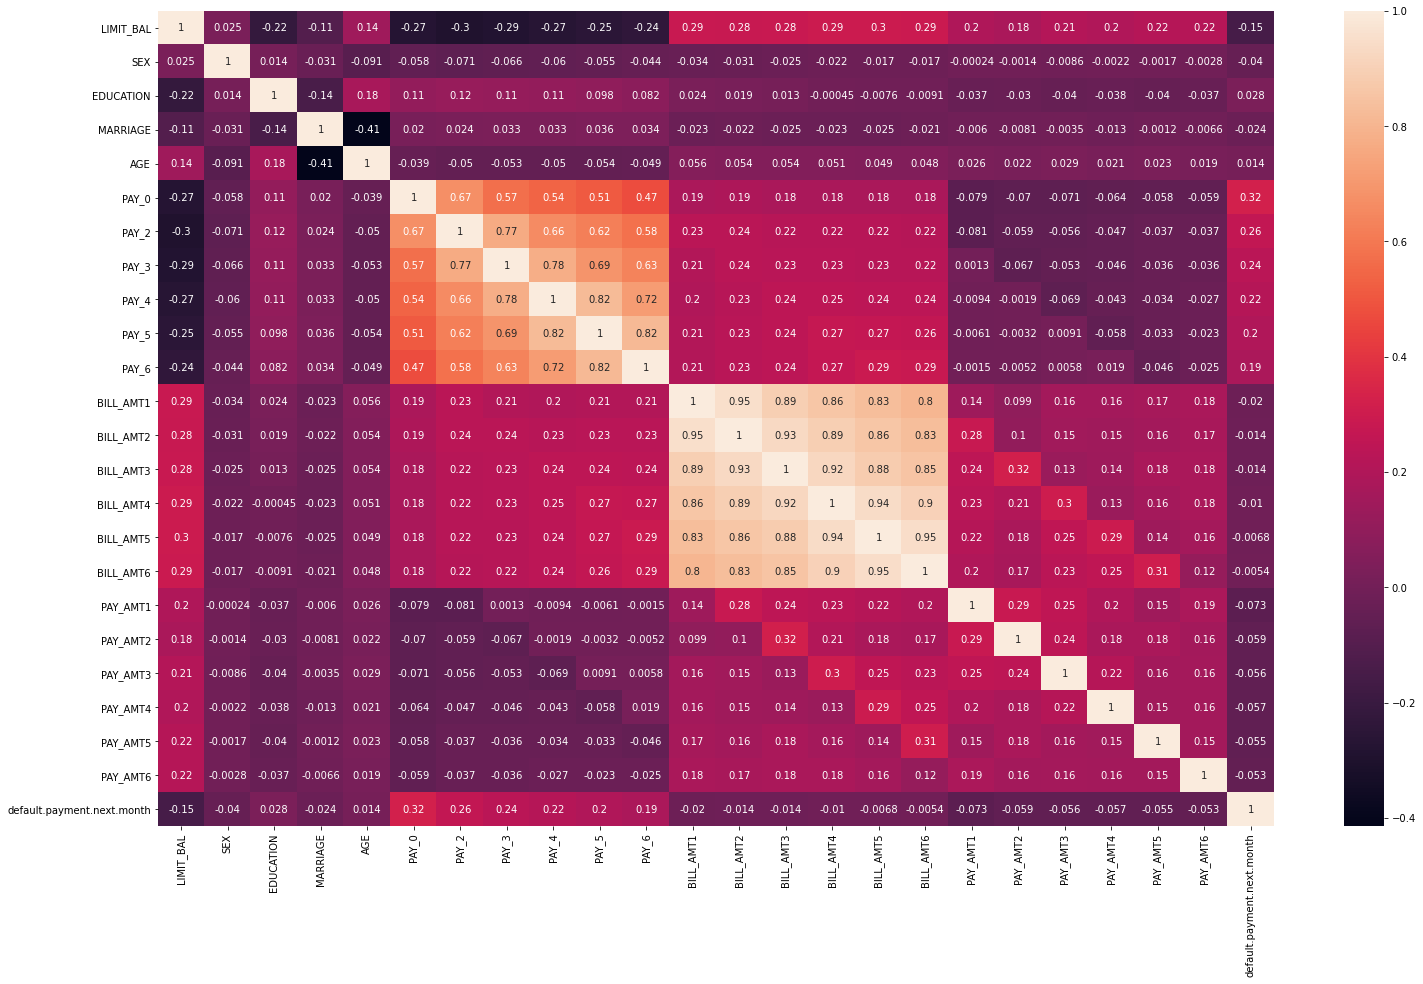

In [9]:
corr = df.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr, annot=True)

## Splitting data into train and test

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [11]:
x = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
y = df['default.payment.next.month']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=3)

xtrain_scaler = MinMaxScaler().fit_transform(x_train)
xtest_scaler = MinMaxScaler().fit_transform(x_test)

# Machine Learning Models:
# 1. KNN:

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

### Checking for which K, model is generating more accuracy. Using normal train and test data.

In [13]:
i = 1
k = np.arange(1, 30, 1)
k_val_acc = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)              # Fitting model with x_train and y_train
    y_pred = knn.predict(x_test)           # Predicting the results
    k_val_acc.append(metrics.accuracy_score(y_test, y_pred))
    print("Accuracy for K = {0} is: ".format(i),metrics.accuracy_score(y_test, y_pred))
    
m = max(k_val_acc)

print("We got max accuracy of {0} when K = {1}". format(max(k_val_acc), [i+1 for i, j in enumerate(k_val_acc) if j == m]))

Accuracy for K = 1 is:  0.6953333333333334
Accuracy for K = 2 is:  0.7757333333333334
Accuracy for K = 3 is:  0.7429333333333333
Accuracy for K = 4 is:  0.7773333333333333
Accuracy for K = 5 is:  0.7585333333333333
Accuracy for K = 6 is:  0.7768
Accuracy for K = 7 is:  0.7649333333333334
Accuracy for K = 8 is:  0.7745333333333333
Accuracy for K = 9 is:  0.7690666666666667
Accuracy for K = 10 is:  0.7768
Accuracy for K = 11 is:  0.7682666666666667
Accuracy for K = 12 is:  0.7812
Accuracy for K = 13 is:  0.774
Accuracy for K = 14 is:  0.7813333333333333
Accuracy for K = 15 is:  0.7750666666666667
Accuracy for K = 16 is:  0.7828
Accuracy for K = 17 is:  0.7792
Accuracy for K = 18 is:  0.784
Accuracy for K = 19 is:  0.7813333333333333
Accuracy for K = 20 is:  0.7838666666666667
Accuracy for K = 21 is:  0.7798666666666667
Accuracy for K = 22 is:  0.7837333333333333
Accuracy for K = 23 is:  0.7809333333333334
Accuracy for K = 24 is:  0.7844
Accuracy for K = 25 is:  0.7826666666666666
Accurac

### Checking for which K, model is generating more accuracy. Using transformed train and test data.

In [14]:
i = 1
k = np.arange(1, 30, 1)
k_val_acc_mms = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain_scaler, y_train)              # Fitting model with xtrain_scaler and y_train
    y_pred_mms = knn.predict(xtest_scaler)       # Predicting the results
    k_val_acc_mms.append(metrics.accuracy_score(y_test, y_pred_mms))
    print("Accuracy for K = {0} is: ".format(i),metrics.accuracy_score(y_test, y_pred_mms))
    
m = max(k_val_acc_mms)

print("We got max accuracy of {0} when K = {1}". format(max(k_val_acc_mms), [i+1 for i, j in enumerate(k_val_acc_mms) if j == m]))

Accuracy for K = 1 is:  0.7030666666666666
Accuracy for K = 2 is:  0.7816
Accuracy for K = 3 is:  0.7636
Accuracy for K = 4 is:  0.7978666666666666
Accuracy for K = 5 is:  0.794
Accuracy for K = 6 is:  0.8084
Accuracy for K = 7 is:  0.8065333333333333
Accuracy for K = 8 is:  0.8105333333333333
Accuracy for K = 9 is:  0.8093333333333333
Accuracy for K = 10 is:  0.8132
Accuracy for K = 11 is:  0.8109333333333333
Accuracy for K = 12 is:  0.8109333333333333
Accuracy for K = 13 is:  0.8130666666666667
Accuracy for K = 14 is:  0.814
Accuracy for K = 15 is:  0.8152
Accuracy for K = 16 is:  0.8132
Accuracy for K = 17 is:  0.8154666666666667
Accuracy for K = 18 is:  0.8142666666666667
Accuracy for K = 19 is:  0.816
Accuracy for K = 20 is:  0.8169333333333333
Accuracy for K = 21 is:  0.8166666666666667
Accuracy for K = 22 is:  0.8169333333333333
Accuracy for K = 23 is:  0.8174666666666667
Accuracy for K = 24 is:  0.8176
Accuracy for K = 25 is:  0.8176
Accuracy for K = 26 is:  0.8170666666666667


### Confusion Matrix of model with transformed data:

Confusion Matrix: 
 [[5609  303]
 [1063  525]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5912
           1       0.63      0.33      0.43      1588

    accuracy                           0.82      7500
   macro avg       0.74      0.64      0.66      7500
weighted avg       0.80      0.82      0.79      7500

Accuracy: 0.8178666666666666
Recall/Sensitivity/True Positive Rate: 0.3306045340050378
Precision: 0.6340579710144928


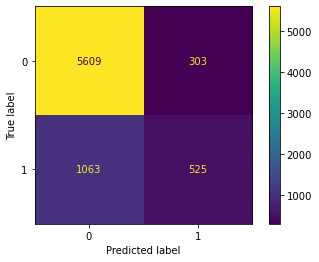

In [15]:
plot_confusion_matrix(knn, xtest_scaler, y_test)

conf_metr = metrics.confusion_matrix(y_test, y_pred_mms)

print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,y_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, y_pred_mms))
print("Precision:",metrics.precision_score(y_test, y_pred_mms))

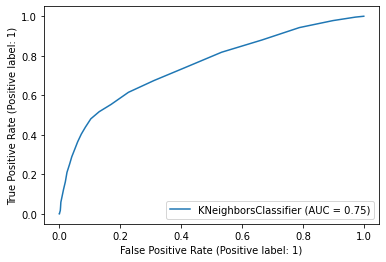

In [16]:
# ROC Curve:
metrics.plot_roc_curve(knn, xtest_scaler, y_test)

# 2. Logistic Regression:

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

### HyperParameter Tuned model with normal train and test data:

In [18]:
c_val = [0.001,0.01,0.1,0.5,1.0]

logreg = LogisticRegression(solver = 'liblinear')
hyperParam = [{'C':c_val}]

gsv = GridSearchCV(logreg,hyperParam,cv=5,verbose=1)
best_model = gsv.fit(x_train, y_train)                      # Fitting model with x_train and y_train
logreg_pred = best_model.best_estimator_.predict(x_test)    # Predicting the results


print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy :",best_model.score(x_test, y_test))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best HyperParameter:  {'C': 0.001}
Best Accuracy : 0.7881333333333334


### HyperParameter Tuned model with transformed training and testing data:

In [19]:
c_val = [0.001,0.01,0.1,0.5,1.0]

logreg = LogisticRegression(solver = 'liblinear')
hyperParam = [{'C':c_val}]

gsv = GridSearchCV(logreg,hyperParam,cv=5,verbose=1)
best_model = gsv.fit(xtrain_scaler, y_train)                       # Fitting model with xtrain_scaler and y_train
logreg_pred_mms = best_model.best_estimator_.predict(xtest_scaler) # Predicting the results

print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy :",best_model.score(xtest_scaler, y_test))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best HyperParameter:  {'C': 1.0}
Best Accuracy : 0.8268


### Confusion Matrix of model with transformed data:

Confusion Matrix: 
 [[5671  241]
 [1058  530]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      5912
           1       0.69      0.33      0.45      1588

    accuracy                           0.83      7500
   macro avg       0.77      0.65      0.67      7500
weighted avg       0.81      0.83      0.80      7500

Accuracy: 0.8268
Recall/Sensitivity/True Positive Rate: 0.3337531486146096
Precision: 0.6874189364461738


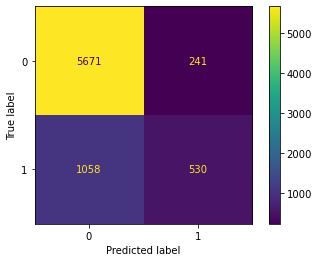

In [20]:
plot_confusion_matrix(gsv,xtest_scaler, y_test)

conf_metr = confusion_matrix(y_test, logreg_pred_mms)

print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,logreg_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, logreg_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, logreg_pred_mms))
print("Precision:",metrics.precision_score(y_test, logreg_pred_mms))

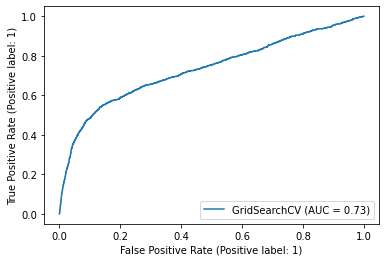

In [21]:
# ROC Curve:
metrics.plot_roc_curve(gsv, xtest_scaler, y_test)

# 3. Decision Tree:

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Unpruned Tree with normal train and test data:

In [16]:
dtree_up = DecisionTreeClassifier()
dtree_up.fit(x_train, y_train)                  # Fitting model with x_train and y_train
dtree_pred_up = dtree_up.predict(x_test)        # Predicting the results
print("Accuracy is: ",metrics.accuracy_score(y_test, dtree_pred_up))

Accuracy is:  0.7332


### Pruned Tree after applying model with normal train and test data:

In [17]:
i = 1
d = np.arange(1, 20, 1)
depth = []
for i in d:
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(x_train, y_train)                # Fitting model with x_train and y_train
    dtree_pred = dtree.predict(x_test)         # Predicting the results
    depth.append(metrics.accuracy_score(y_test, dtree_pred))
    print("Accuracy when max_depth = {0}: ".format(i),metrics.accuracy_score(y_test, dtree_pred))

m = max(depth)

print("We got max accuracy of {0} when max_depth = {1}". format(max(depth), [i+1 for i, j in enumerate(depth) if j == m]))

Accuracy when max_depth = 1:  0.8294666666666667
Accuracy when max_depth = 2:  0.8290666666666666
Accuracy when max_depth = 3:  0.83
Accuracy when max_depth = 4:  0.8304
Accuracy when max_depth = 5:  0.8297333333333333
Accuracy when max_depth = 6:  0.8277333333333333
Accuracy when max_depth = 7:  0.8276
Accuracy when max_depth = 8:  0.8244
Accuracy when max_depth = 9:  0.8213333333333334
Accuracy when max_depth = 10:  0.8178666666666666
Accuracy when max_depth = 11:  0.8154666666666667
Accuracy when max_depth = 12:  0.8132
Accuracy when max_depth = 13:  0.8056
Accuracy when max_depth = 14:  0.7993333333333333
Accuracy when max_depth = 15:  0.7916
Accuracy when max_depth = 16:  0.7868
Accuracy when max_depth = 17:  0.7789333333333334
Accuracy when max_depth = 18:  0.7758666666666667
Accuracy when max_depth = 19:  0.7693333333333333
We got max accuracy of 0.8304 when max_depth = [4]


### Pruned Tree applying model with transformed training and testing data:

In [18]:
i = 1
d = np.arange(1, 20, 1)
depth_mms = []
for i in d:
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(xtrain_scaler, y_train)             # Fitting model with xtrain_scaler and y_train
    dtree_pred_mms = dtree.predict(xtest_scaler)  # Predicting the results
    depth_mms.append(metrics.accuracy_score(y_test, dtree_pred_mms))
    print("Accuracy when max_depth = {0}: ".format(i),metrics.accuracy_score(y_test, dtree_pred_mms))

m = max(depth_mms)

print("We got max accuracy of {0} when max_depth = {1}". format(max(depth_mms), [i+1 for i, j in enumerate(depth_mms) if j == m]))

Accuracy when max_depth = 1:  0.8294666666666667
Accuracy when max_depth = 2:  0.8061333333333334
Accuracy when max_depth = 3:  0.8306666666666667
Accuracy when max_depth = 4:  0.8250666666666666
Accuracy when max_depth = 5:  0.8241333333333334
Accuracy when max_depth = 6:  0.8057333333333333
Accuracy when max_depth = 7:  0.8182666666666667
Accuracy when max_depth = 8:  0.8064
Accuracy when max_depth = 9:  0.8038666666666666
Accuracy when max_depth = 10:  0.77
Accuracy when max_depth = 11:  0.7342666666666666
Accuracy when max_depth = 12:  0.6718666666666666
Accuracy when max_depth = 13:  0.6394666666666666
Accuracy when max_depth = 14:  0.6356
Accuracy when max_depth = 15:  0.6129333333333333
Accuracy when max_depth = 16:  0.6146666666666667
Accuracy when max_depth = 17:  0.5988
Accuracy when max_depth = 18:  0.5976
Accuracy when max_depth = 19:  0.5770666666666666
We got max accuracy of 0.8306666666666667 when max_depth = [3]


### Confusion Matrix of Pruned Tree model with transformed training and testing data:

Confusion Matrix: 
 [[3606 2306]
 [ 866  722]]
              precision    recall  f1-score   support

           0       0.81      0.61      0.69      5912
           1       0.24      0.45      0.31      1588

    accuracy                           0.58      7500
   macro avg       0.52      0.53      0.50      7500
weighted avg       0.69      0.58      0.61      7500

Accuracy: 0.5770666666666666
Recall/Sensitivity/True Positive Rate: 0.45465994962216627
Precision: 0.23844121532364598


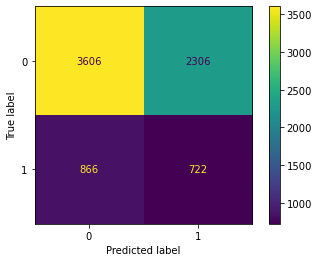

In [19]:
plot_confusion_matrix(dtree, xtest_scaler, y_test)

conf_metr = metrics.confusion_matrix(y_test, dtree_pred_mms)

print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,dtree_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, dtree_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, dtree_pred_mms))
print("Precision:",metrics.precision_score(y_test, dtree_pred_mms))

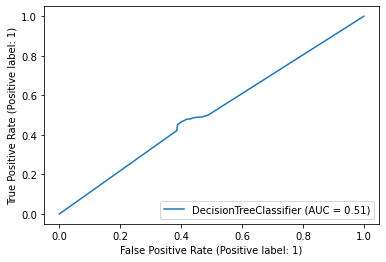

In [20]:
# ROC Curve:
metrics.plot_roc_curve(dtree, xtest_scaler, y_test)

### Visualizing Decision Tree

In [27]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

In [ ]:
feat = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feat,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Credit_Card_Tree.png')
Image(graph.create_png())

# 4. Random Forest:

In [29]:
from sklearn.ensemble import RandomForestClassifier

### Simple Random Forest with transformed data:

In [30]:
rf = RandomForestClassifier()
rf.fit(xtrain_scaler, y_train)             # Fitting model with xtrain_scaler and y_train
rf_pred = rf.predict(xtest_scaler)         # Predicting the results
#est_per.append(metrics.accuracy_score(y_test, rf_pred))
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, rf_pred)))

Accuracy: 0.7954666666666667


### Hyperparameter Tuned Random Forest with transformed data:

In [33]:
estimators = [10,50,80,100,150,200,250,300]

rf = RandomForestClassifier(max_depth=3,random_state=5)
hyperParam = [{'n_estimators':estimators}]

gsv = GridSearchCV(rf,hyperParam,cv=5,verbose=1)
best_model = gsv.fit(xtrain_scaler, y_train)                       # Fitting model with xtrain_scaler and y_train
rf_pred_mms = best_model.best_estimator_.predict(xtest_scaler)     # Predicting the results

print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy :",best_model.score(xtest_scaler, y_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best HyperParameter:  {'n_estimators': 10}
Best Accuracy : 0.818


### Confusion Matrix of Hyperparameter Tuned Random Forest model with transformed data:

Confusion Matrix: 
 [[5731  181]
 [1184  404]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      5912
           1       0.69      0.25      0.37      1588

    accuracy                           0.82      7500
   macro avg       0.76      0.61      0.63      7500
weighted avg       0.80      0.82      0.78      7500

Accuracy: 0.818
Recall/Sensitivity/True Positive Rate: 0.25440806045340053
Precision: 0.6905982905982906


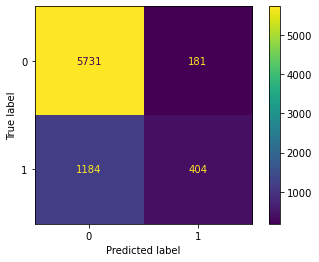

In [34]:
plot_confusion_matrix(gsv, xtest_scaler, y_test)

conf_metr = confusion_matrix(y_test, rf_pred_mms)

print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,rf_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, rf_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, rf_pred_mms))
print("Precision:",metrics.precision_score(y_test, rf_pred_mms))

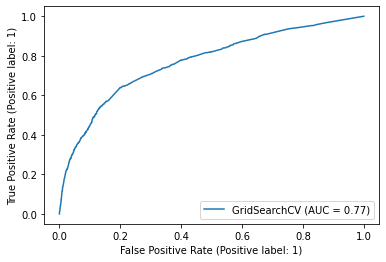

In [35]:
# ROC Curve:
metrics.plot_roc_curve(gsv, xtest_scaler, y_test)

# 5. SVC (Support Vector Classifier):

In [36]:
from sklearn.svm import SVC

### Tuned Model with transformed data:

In [37]:
kernels = ['rbf','linear','poly','sigmoid']

svc = SVC()
hyperParam = [{'kernel':kernels}]

gsv = GridSearchCV(svc,hyperParam,cv=5,verbose=1)
best_model = gsv.fit(xtrain_scaler, y_train)                       # Fitting model with xtrain_scaler and y_train
svc_pred_mms = best_model.best_estimator_.predict(xtest_scaler)    # Predicting the results

print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy :",best_model.score(xtest_scaler, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best HyperParameter:  {'kernel': 'poly'}
Best Accuracy : 0.8164


### Confusion Matrix Tuned Model with transformed data:

Confusion Matrix: 
 [[5750  162]
 [1215  373]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      5912
           1       0.70      0.23      0.35      1588

    accuracy                           0.82      7500
   macro avg       0.76      0.60      0.62      7500
weighted avg       0.80      0.82      0.78      7500

Accuracy: 0.8164
Recall/Sensitivity/True Positive Rate: 0.23488664987405541
Precision: 0.697196261682243


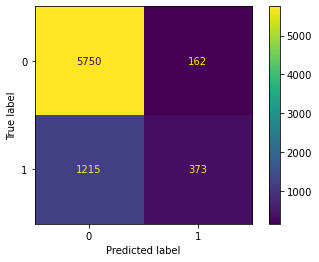

In [38]:
plot_confusion_matrix(gsv, xtest_scaler, y_test)

conf_metr = confusion_matrix(y_test, svc_pred_mms)

print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,svc_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, svc_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, svc_pred_mms))
print("Precision:",metrics.precision_score(y_test, svc_pred_mms))

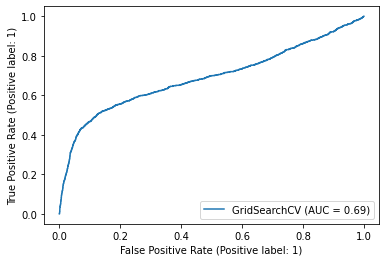

In [39]:
# ROC Curve:
metrics.plot_roc_curve(gsv, xtest_scaler, y_test)

# Bagging with all classifiers using Cross Validation:

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

In [41]:
# Creating classifiers
knn = KNeighborsClassifier()
lg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()

clf_array = [knn, lg, dt, rf,svc]

for clf in clf_array:
    cc_scores = cross_val_score(clf, x, y, cv=10, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, max_samples=0.25, max_features=10, random_state=3)
    bagging_scores = cross_val_score(bagging_clf, x, y, cv=10, n_jobs=-1)
    
    print("Accuracy of: {1:.3f}, std: (+/-) {2:.3f} [{0}]".format(clf.__class__.__name__,cc_scores.mean(), cc_scores.std()))
    print("Accuracy of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf.__class__.__name__,bagging_scores.mean(), bagging_scores.std()))

Accuracy of: 0.756, std: (+/-) 0.007 [KNeighborsClassifier]
Accuracy of: 0.783, std: (+/-) 0.002 [Bagging KNeighborsClassifier]

Accuracy of: 0.779, std: (+/-) 0.001 [LogisticRegression]
Accuracy of: 0.781, std: (+/-) 0.002 [Bagging LogisticRegression]

Accuracy of: 0.726, std: (+/-) 0.010 [DecisionTreeClassifier]
Accuracy of: 0.803, std: (+/-) 0.007 [Bagging DecisionTreeClassifier]

Accuracy of: 0.816, std: (+/-) 0.010 [RandomForestClassifier]
Accuracy of: 0.815, std: (+/-) 0.008 [Bagging RandomForestClassifier]

Accuracy of: 0.779, std: (+/-) 0.000 [SVC]
Accuracy of: 0.779, std: (+/-) 0.000 [Bagging SVC]



In [42]:
clf = [knn, lg, dt, rf,svc]
eclf = VotingClassifier(estimators=[('KNN', knn), ('Logistic Regression', lg), ('Decision Tree', dt), ('Random Forest', rf), ('SVC', svc)], voting='hard')
for clf, label in zip([knn, lg, dt, rf,svc, eclf], ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'Ensemble']):
    scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
    print("Accuracy: %0.3f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.750 (+/- 0.01) [KNN]
Accuracy: 0.775 (+/- 0.00) [Logistic Regression]
Accuracy: 0.722 (+/- 0.01) [Decision Tree]
Accuracy: 0.815 (+/- 0.01) [Random Forest]
Accuracy: 0.776 (+/- 0.00) [SVC]
Accuracy: 0.786 (+/- 0.00) [Ensemble]


# Boosting with all classifiers using Cross Validation:

In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import EnsembleVoteClassifier

In [44]:
# Creating classifiers
knn = KNeighborsClassifier()
lg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier()
xgb_boost = XGBClassifier()
boost_array = [ada_boost, grad_boost, xgb_boost]
clf = [knn, lg, dt, rf,svc]
eclf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')
labels = ['Ada Boost', 'Grad Boost', 'XG Boost', 'Ensemble']
for clf, label in zip([ada_boost, grad_boost, xgb_boost, eclf], labels):
    scores = cross_val_score(clf, x, y, cv=10, scoring='accuracy')
    print("Accuracy: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Accuracy: 0.817, std: (+/-) 0.009 [Ada Boost]
Accuracy: 0.821, std: (+/-) 0.011 [Grad Boost]
[18:02:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:02:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:02:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to res